In [53]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from PIL import Image
from IPython.display import display, HTML
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from fuzzywuzzy import process
import requests
from io import BytesIO
from urllib.request import urlopen
import ast
import IPython
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

In [55]:
df = pd.read_csv("anime-dataset-2023.csv")
#df = df[df['Score'] != 'UNKNOWN']
#df = df[df['Genres'] != 'UNKNOWN']
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity has expanded across the galaxy, filling the surface of other planets with settlements like those on Earth. These new societies are plagued by murder, drug use, and theft, and intergalactic outlaws are hunted by a growing number of tough bounty hunters.\n\nSpike Spiegel and Jet Black pursue criminals throughout space to make a humble living. Beneath his goofy and aloof demeanor, Spike is haunted by the weight of his violent past. Meanwhile, Jet manages his own troubled memories while taking care of Spike and the Bebop, their ship. The duo is joined by the beautiful con artist Faye Valentine, odd child Edward Wong Hau Pepelu Tivrusky IV, and Ein, a bioengineered Welsh Corgi.\n\nWhile developing bonds and working to catch a colorful cast of criminals, the Bebop crew's lives are disrupted by a menace from Spike's past. As a rival's maniacal plot continues to unravel, Spike must choose between life with his newfound family or revenge for his old wounds.",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/19644.jpg
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator.\n\nWith lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized.",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/93480.jpg
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs.\n\nWith his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash's agonizing past will be unraveled and his morality and principles pushed to the breaking point.",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 1

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [59]:
for column in df.columns:
    if df[column].isna().any():
        print(column, "has NA value")
    if df[column].isnull().any():
        print(column, "has null value")

# VISUALIZATION
## Relationship Between Studios and Scores

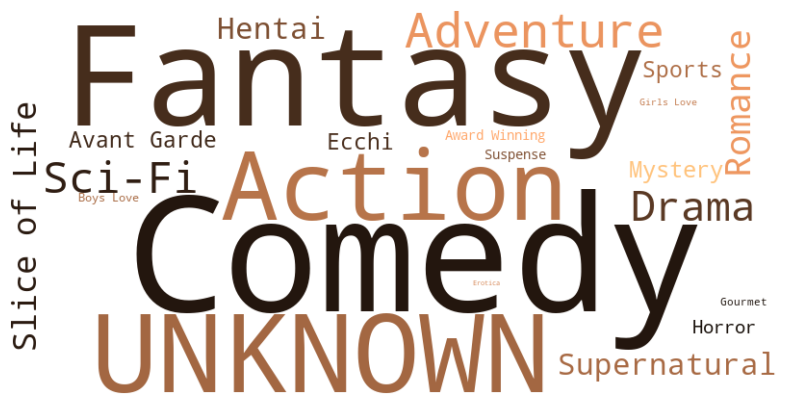

In [62]:
all_genres = df["Genres"].str.split(', ').explode()
genre_frequency = all_genres.value_counts().to_dict()

wordcloud = WordCloud(width = 800, height = 400, background_color = "white",contour_width = 2,
     contour_color = 'black', colormap = 'copper', stopwords = 'UNKNOWN').generate_from_frequencies(genre_frequency)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

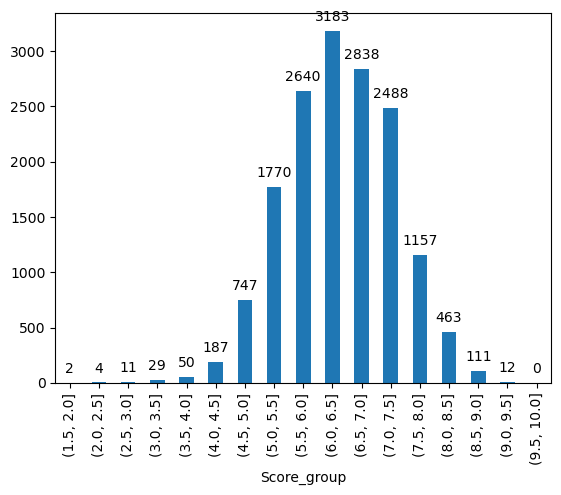

In [63]:
score_bins = [i * 0.5 for i in range(3,21)]
df_scores = df.copy()

df_scores['Score'] = pd.to_numeric(df_scores['Score'], errors='coerce')


df_scores = df_scores.dropna(subset=['Score'])


df['Score_group'] = pd.cut(df_scores['Score'], bins=score_bins)


df_score_groups = df['Score_group'].value_counts().sort_index()
ax = df_score_groups.plot(kind="bar")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

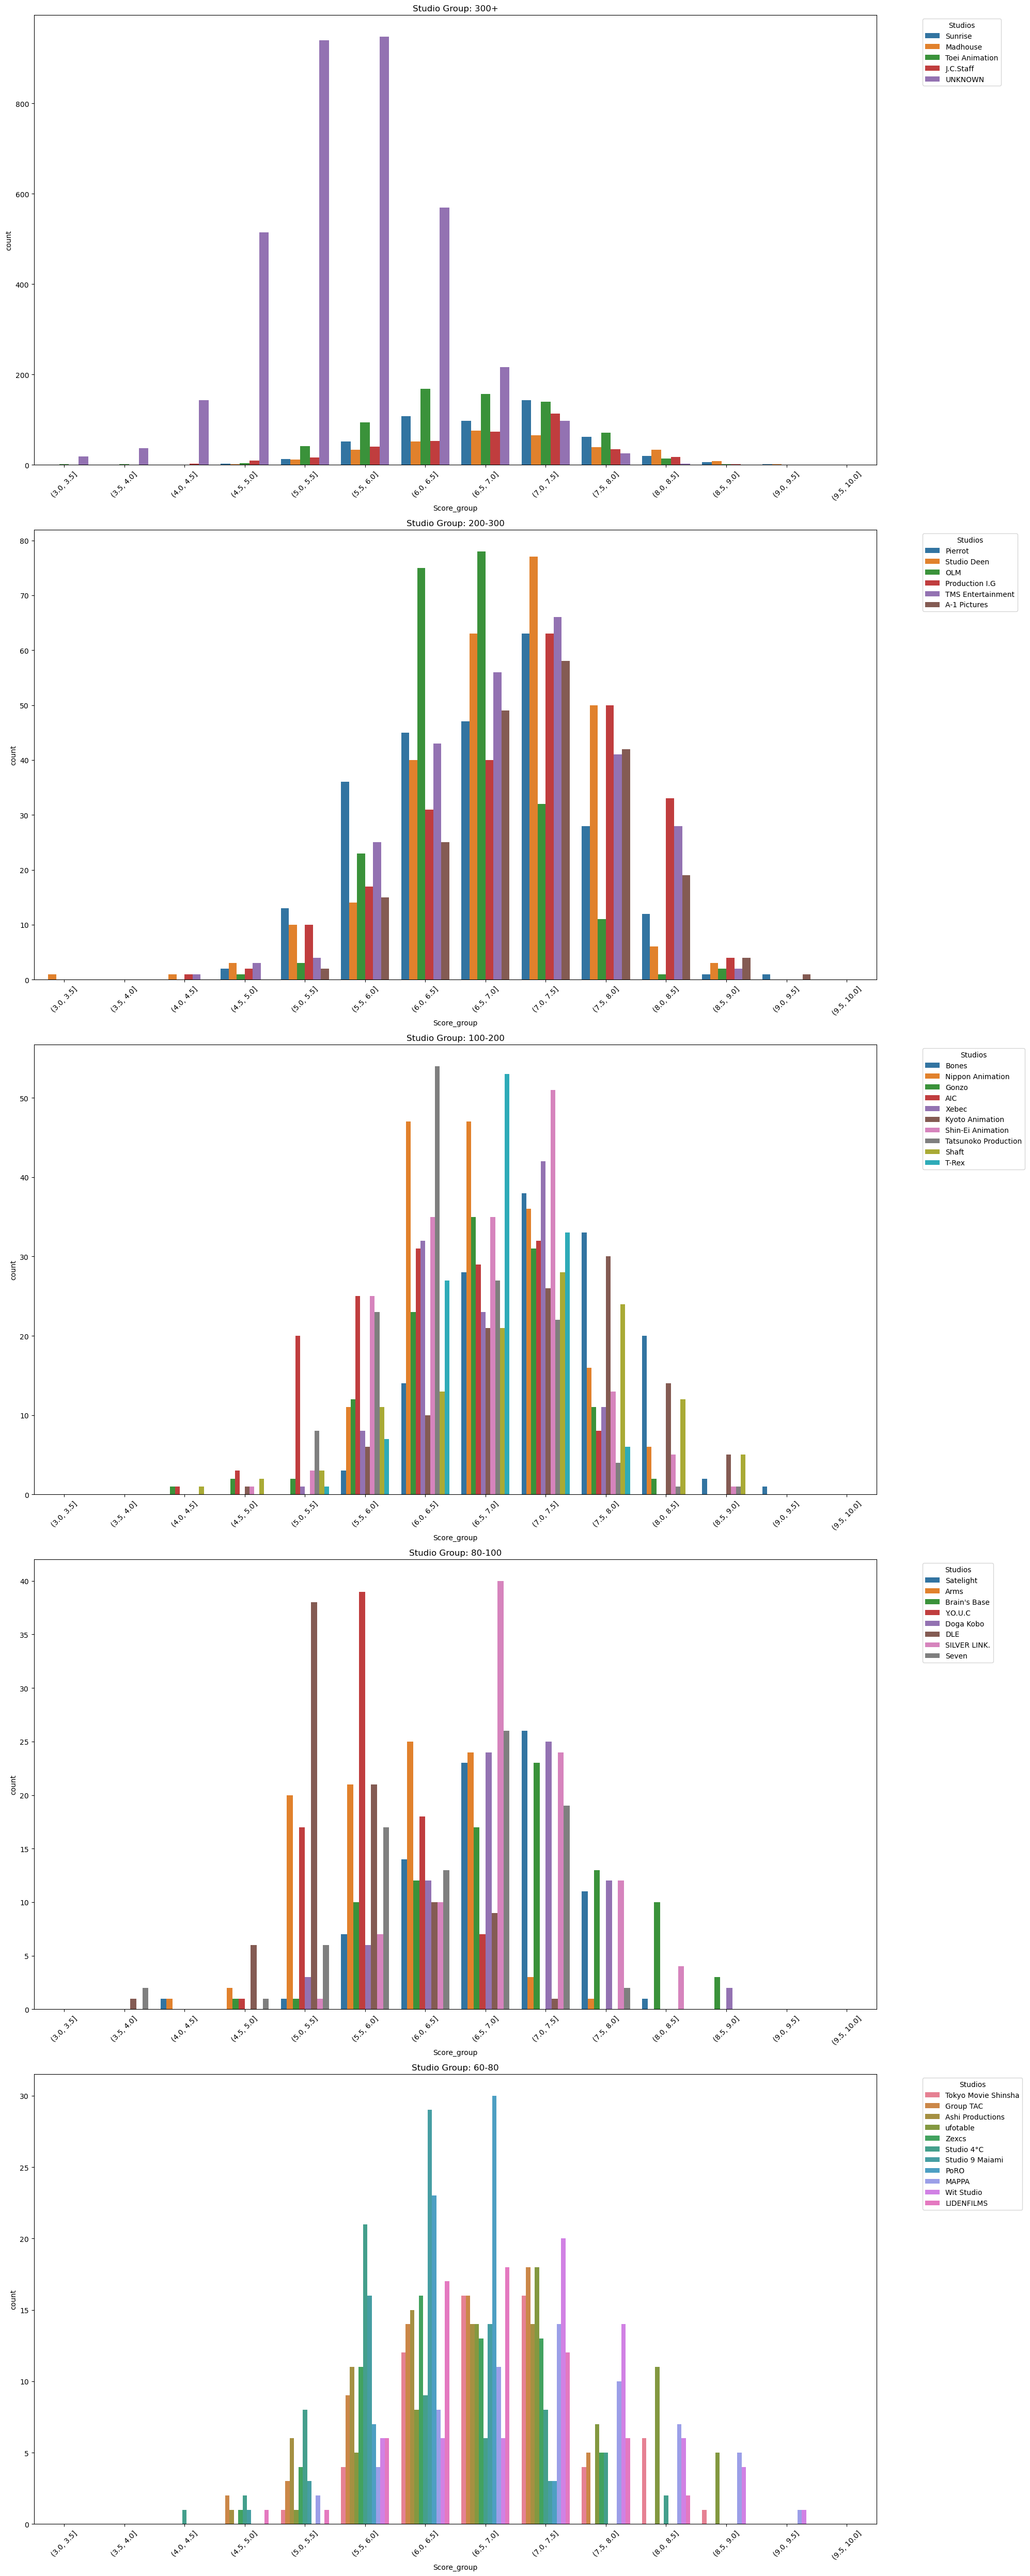

In [64]:
#df = df[df['Studios'] != 'UNKNOWN']
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df = df.dropna(subset=['Score']) 


score_bins = [3.0, 3.5, 4.0, 4.5, 5.0, 
              5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
df['Score_group'] = pd.cut(df['Score'], bins=score_bins)


studio_counts = df['Studios'].value_counts()


def group_studio_counts(count):
    if count > 300:
        return '300+'
    elif 200 <= count <= 300:
        return '200-300'
    elif 100 <= count < 200:
        return '100-200'
    elif 80 <= count < 100:
        return '80-100'
    elif 60 <= count < 80:
        return '60-80'
    else:
        return 'Under 60'


studio_groups = studio_counts.apply(group_studio_counts)
df['Studio_group'] = df['Studios'].map(studio_groups)


df = df[df['Studio_group'].isin(['300+', '200-300', '100-200', '80-100', '60-80'])]


plt.figure(figsize=(20, 50))


groups = ['300+', '200-300', '100-200', '80-100', '60-80']


for i, group in enumerate(groups):
    plt.subplot(5, 1, i + 1)
    group_df = df[df['Studio_group'] == group]
    sns.countplot(x='Score_group', hue='Studios', data=group_df)
    plt.title(f'Studio Group: {group}')
    plt.xticks(rotation=45)
    plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

## Creating HTML Table for Recommendation Visuals

In [68]:
def create_html_table(df):
    html = '<table style="border-collapse: collapse; width: 100%;">'
    html += '<tr><th style="border: 1px solid black; padding: 8px;">Name</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Genres</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Score</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Image</th></tr>'
    
    for index, row in df.iterrows():
        html += '<tr>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Name"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Genres"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Score"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;"><img src="{row["Image URL"]}" width="50"></td>'
        html += '</tr>'
        
    html += '</table>'
    return HTML(html)

# MODELS

## Classfying Only Genre

In [71]:
df = pd.read_csv("anime-dataset-2023.csv")

In [75]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['Name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:20] 
    
    anime_indices = [i[0] for i in sim_scores]
    return df['Name'].iloc[anime_indices]


print(get_recommendations('Berserk'))

6099     Berserk: Ougon Jidai-hen I - Haou no Tamago   
6670     Berserk: Ougon Jidai-hen II - Doldrey Kouryaku
6671     Berserk: Ougon Jidai-hen III - Kourin         
11294    Berserk                                       
12168    Berserk 2nd Season                            
12686    Berserk Recap                                 
23140    Berserk: Ougon Jidai-hen - Memorial Edition   
24830    Castlevania                                   
1007     Youjuu Toshi                                  
9798     Koutetsujou no Kabaneri                       
11875    Koutetsujou no Kabaneri Movie 1: Tsudou Hikari
11876    Koutetsujou no Kabaneri Movie 2: Moeru Inochi 
12419    Koutetsujou no Kabaneri Movie 3: Unato Kessen 
24801    Castlevania (Netflix animated series)         
13127    Berserk: Majo no Tsuisou                      
642      Kyuuketsuhime Miyu (TV)                       
1211     Violence Jack: Harlem Bomber-hen              
1212     Violence Jack: Jigoku Gai-hen          

## Only Synopsis

### Construct Similarity Matrices

In [84]:
tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), stop_words='english')

tfv_matrix = tfv.fit_transform(df['Synopsis'])
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

### Give Recommendations

In [87]:
def give_recommendations(title, sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:6]
    animeindices = [i[0] for i in sig_scores]
    recommendations = df[['Name', 'Genres', 'Score','Image URL']].iloc[animeindices]
    display(create_html_table(recommendations))
    #return recommendations

give_recommendations("One Punch Man")

Name,Genres,Score,Image
Urawa no Usagi-chan,Comedy,5.37,
One Punch Man: Road to Hero,"Action, Comedy",7.7,
One Punch Man 2nd Season,"Action, Comedy",7.5,
The Four Seasons,Slice of Life,6.07,
Kankou Taisen Saitama: Sakuya no Tatakai,UNKNOWN,UNKNOWN,


## Recommending With Genre and Synopsis Combined

In [32]:
df = pd.read_csv('anime-dataset-2023.csv')


### Data Preprocessing

In [35]:
def find_best_match(title, title_list):
    examples = process.extract(title, title_list, limit = 10)
    for i in range(len(examples)):
        if examples[i][1] > 40:
            print(i+1, examples[i][0])
    print("-"*40)
    return examples

def choose_best_match(example_list):
    
    choice = int(input("Please Choose One of The Following as a Number: "))
    print('')
    
    return example_list[choice-1][0]
    print("Recommending anime/manga according to the choice")

In [37]:
def create_html_table(df):
    html = '<table style="border-collapse: collapse; width: 100%;">'
    html += '<tr><th style="border: 1px solid black; padding: 8px;">Name</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Genres</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Score</th>'
    html += '<th style="border: 1px solid black; padding: 8px;">Image</th></tr>'
    
    for index, row in df.iterrows():
        html += '<tr>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Name"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Genres"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;">{row["Score"]}</td>'
        html += f'<td style="border: 1px solid black; padding: 8px;"><img src="{row["Image URL"]}" width="50"></td>'
        html += '</tr>'
        
    html += '</table>'
    return HTML(html)

In [39]:
def convert_genres(genre):
    try:
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list):
            return ', '.join(genre_list)
    except (ValueError, SyntaxError): 
        return genre
    return genre

def filter_genres(genre_string):

    genres = genre_string.split(", ")

    filtered_genres = [genre for genre in genres if genre in allowed_genres]
    return ", ".join(filtered_genres)

allowed_genres = ['Action', 'Award Winning', 'Sci-Fi', 'Adventure', 'Drama', 'Mystery', 'Supernatural', 'Fantasy', 'Sports', 'Comedy', 'Romance', 'Slice of Life', 'Suspense', 'Ecchi', 'Gourmet', 'Avant Garde', 'Horror', 'Girls Love', 'Boys Love', 'Hentai', 'UNKNOWN', 'Erotica']

df1 = pd.read_csv("anime-dataset-2023.csv")
df2 = pd.read_csv("data.csv")

df1 = df1[['Name', 'Synopsis', 'Score', 'Genres', 'Image URL']]
df2 = df2[['Name', 'Synopsis', 'Score', 'Genres', 'Image URL']]

df2['Score'] = df2['Score'] * 2

df2['Genres'] = df2['Genres'].apply(convert_genres)
df2['Genres'] = df2['Genres'].apply(filter_genres)

df1['Score'] = pd.to_numeric(df1['Score'], errors='coerce').fillna(0).astype(int)
df2 = df2[~df2['Name'].str.contains('Novel', case=False, na=False)]
df1 = df1[df1['Score'] > 5.23]
df2 = df2[df2['Score'] > 9]
df2 = df2[df2['Synopsis'] != "This entry currently doesn't have a synopsis. Check back soon!"]
df = pd.concat([df1, df2])

df = df.drop_duplicates(subset='Name').copy()
df = df.reset_index(drop=True)
df_names = df['Name']

In [40]:
def clean_genres(x):
    if isinstance(x['Genres'], str):
        gen = x['Genres'].replace(";", ", ")
    else:
        gen = ""
        
    return gen

df['Synopsis'].fillna("", inplace = True)

df['Genres'] = df.apply(clean_genres, axis = 1)

C:\Users\bhoca\AppData\Local\Temp\ipykernel_4104\1187704710.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Synopsis'].fillna("", inplace = True)


### Construct Similarity Matrices

In [44]:
indices = pd.Series(df.index, index = df['Name'])

tfidf = TfidfVectorizer(stop_words = "english")
countvec = CountVectorizer(stop_words = "english")

tfidf_mat = tfidf.fit_transform(df['Synopsis'])
countvect_mat = countvec.fit_transform(df['Genres'])

syn_similarity = linear_kernel(tfidf_mat, tfidf_mat)
genre_similarity = linear_kernel(countvect_mat, countvect_mat)

### Get Recommendations

In [47]:
def getRecommendation(title, numbers = 41):
    
    idx = indices[title]
    
    
    score_1 = list(enumerate(syn_similarity[idx]))
    score_2 = list(enumerate(genre_similarity[idx]))
    
    score_1 = sorted(score_1, key = lambda x: x[0], reverse = False)
    score_2 = sorted(score_2, key = lambda x: x[0], reverse = False)    
    
    combined_score = [(idx, (sc_1 + sc_2) / 2) for (idx, sc_1), (_, sc_2) in zip(score_1, score_2)]
    
    combined_score = sorted(combined_score, key = lambda x: x[1], reverse = True)
    
    anime_ids = [i[0] for i in combined_score[1:numbers]]
    
    recommendations =  df[['Name', 'Genres', 'Score','Image URL']].iloc[anime_ids]
    #recommendations = recommendations[~recommendations['Name'].str.contains(title, case=False, na=False)]
    recommendations = (recommendations[recommendations['Score'] != 'UNKNOWN']).sort_values(by='Score', ascending=False)
    
    display(create_html_table(recommendations))
    
def showRecommendation(anime_name, number = 41):
    print (f"Your Anime: {anime_name}\n\nRecommended Anime for you: \n")
    getRecommendation(anime_name, number)

In [49]:
def getRecommendation(title, numbers=11):
    # Ana animenin index'ini alıyoruz
    idx = indices[title]
    
    # Benzerlik skorlarını alıyoruz
    score_1 = list(enumerate(syn_similarity[idx]))
    score_2 = list(enumerate(genre_similarity[idx]))
    
    # Skorları indexe göre sıralıyoruz
    score_1 = sorted(score_1, key=lambda x: x[0], reverse=False)
    score_2 = sorted(score_2, key=lambda x: x[0], reverse=False)    
    
    # Skorları ortalıyoruz
    combined_score = [(idx, (sc_1 + sc_2) / 2) for (idx, sc_1), (_, sc_2) in zip(score_1, score_2)]
    
    # Skorlara göre sıralıyoruz
    combined_score = sorted(combined_score, key=lambda x: x[1], reverse=True)
    
    # Önerilerin index'lerini alıyoruz
    anime_ids = [i[0] for i in combined_score[1:]]  # Burada sınırlama yapmıyoruz, tümünü alıyoruz.
    
    # Önerilen animeleri alıyoruz
    recommendations = df[['Name', 'Genres', 'Score', 'Image URL']].iloc[anime_ids]
    
    # Ana animenin adını içeren önerileri filtreliyoruz
    filtered_recommendations = recommendations[~recommendations['Name'].str.contains(title, case=False, na=False)]
    
    # Eksik önerileri tamamlamak için: Eğer yeterli öneri yoksa
    if len(filtered_recommendations) < numbers:
        # Filtrelenmemiş önerilerden geri kalanları ekliyoruz (title içerse bile)
        missing_count = numbers - len(filtered_recommendations)
        extra_recommendations = recommendations.iloc[:missing_count]  # En üstten eksik olan kadar öneri alıyoruz
        
        # Son listeyi birleştiriyoruz
        final_recommendations = pd.concat([filtered_recommendations, extra_recommendations]).drop_duplicates().head(numbers)
    else:
        # Eğer öneri sayısı yeterliyse, sadece filtrelenmiş olanları alıyoruz
        final_recommendations = filtered_recommendations.head(numbers)
    
    # 'UNKNOWN' olanları filtreliyoruz ve skora göre sıralıyoruz
    final_recommendations = final_recommendations[final_recommendations['Score'] != 'UNKNOWN'].sort_values(by='Score', ascending=False)
    
    # Önerileri görüntülüyoruz
    display(create_html_table(final_recommendations))


In [51]:
def Greet(inputum = False, renamed = ''):
    if inputum:
        print("-"*40)
        return renamed
        print("-"*40)
    else:
        print("-"*40)
        a = input("Hangi anime ?  ")
        print("-"*40)
        return a


while True:
    
    a = Greet()
    a = find_best_match(a,df_names)
    yesno = input('If none of them is your anime please press Y after that please rewrite the name again.')
    if yesno.lower() == 'y':    
        renamed = input('Please write the anime name here!!!')
        a = Greet(inputum = True, renamed = renamed )
        a = find_best_match(a,df_names)
        
    a = choose_best_match(a)
    
    print("-"*40)
    showRecommendation(a, 21)
    
    quit = input('If you want to quit press Q/q')
    
    if quit.lower() == 'q':
        break
    


----------------------------------------


Hangi anime ?   onepşce


----------------------------------------
1 C³
2 One Piece
3 Cue!
4 Heppoko Jikken Animation Excel♥Saga
5 One Piece Movie 01
6 One Piece Movie 02: Nejimaki-jima no Daibouken
7 One Piece Movie 03: Chinjuu-jima no Chopper Oukoku
8 One Piece Movie 04: Dead End no Bouken
9 One Piece Movie 05: Norowareta Seiken
10 One Piece Movie 07: Karakuri-jou no Mecha Kyohei
----------------------------------------


If none of them is your anime please press Y after that please rewrite the name again. Y
Please write the anime name here!!! onepşece


----------------------------------------
1 C³
2 One Piece
3 Cue!
4 One Piece 4D
5 One Piece Movie 01
6 One Piece Movie 02: Nejimaki-jima no Daibouken
7 One Piece Movie 03: Chinjuu-jima no Chopper Oukoku
8 One Piece Movie 04: Dead End no Bouken
9 One Piece Movie 05: Norowareta Seiken
10 One Piece Movie 06: Omatsuri Danshaku to Himitsu no Shima
----------------------------------------


Please Choose One of The Following as a Number:  2



----------------------------------------
Your Anime: One Piece

Recommended Anime for you: 



Name,Genres,Score,Image
Tower of God,"Action, Adventure, Drama, Fantasy",9.2,
Magi: Sinbad no Bouken (TV),"Action, Adventure, Fantasy",7.0,
Shinchou Yuusha: Kono Yuusha ga Ore Tueee Kuse ni Shinchou Sugiru,"Action, Adventure, Comedy, Fantasy",7.0,
Dragon Ball: Episode of Bardock,"Action, Adventure, Comedy, Fantasy, Sci-Fi",7.0,
Dog Days',"Action, Adventure, Fantasy",7.0,
Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy",7.0,
Chain Chronicle: Haecceitas no Hikari Part 1,"Action, Adventure, Fantasy",7.0,
Fairy Tail (2014),"Action, Adventure, Fantasy",7.0,
Chain Chronicle: Haecceitas no Hikari Part 3,"Action, Adventure, Fantasy",7.0,
Tales of Symphonia The Animation: Sylvarant-hen,"Action, Adventure, Fantasy",7.0,


If you want to quit press Q/q q
